## Observations and Insights 

In [ ]:
Observations made

1. Is seems mouse weight has a effect on the Tumor volume
2. The study has close to the same number of male and female mice
3. Looking at the statistic table, all drugs seem to work equally

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_index = combined_df.set_index("Mouse ID")
#duplicate_mouse_index
data_duplicate_mouse_id = duplicate_mouse_index.loc[duplicate_mice_id]
data_duplicate_mouse_id

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = duplicate_mouse_index.drop(duplicate_mice_id)

# Now we need to reset index so Mouse ID is a column again
clean_df.reset_index(inplace=True)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_df["Mouse ID"].nunique()
num_mice_clean
#clean_df.info()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_reg_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_reg_mean

drug_reg_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_reg_median

drug_reg_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_reg_var

drug_reg_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_reg_std

drug_reg_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_reg_sem

summary_stats_table = pd.DataFrame({"MEAN": drug_reg_mean,
                                   "MEDIAN": drug_reg_median,
                                   "VARIANCE": drug_reg_var,
                                   "STD DEVIATION": drug_reg_std,
                                   "SEM": drug_reg_sem})
summary_stats_table.round(2)

,MEAN,MEDIAN,VARIANCE,STD DEVIATION,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Reference website: https://jamesrledoux.com/code/group-by-aggregate-pandas
single_groupby = clean_df.groupby("Drug Regimen")
summary_stats_table2 = single_groupby.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats_table2.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


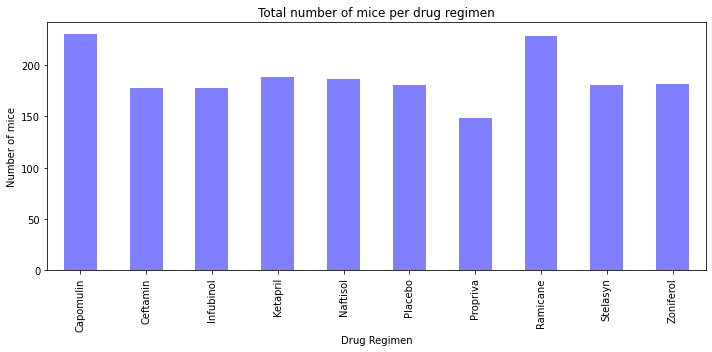

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
num_mice = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
print(num_mice)

num_mice.plot(kind="bar", facecolor="b", title="Total number of mice per drug regimen", figsize=(10,5), alpha=0.5)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of mice", fontsize=10)
plt.tight_layout()

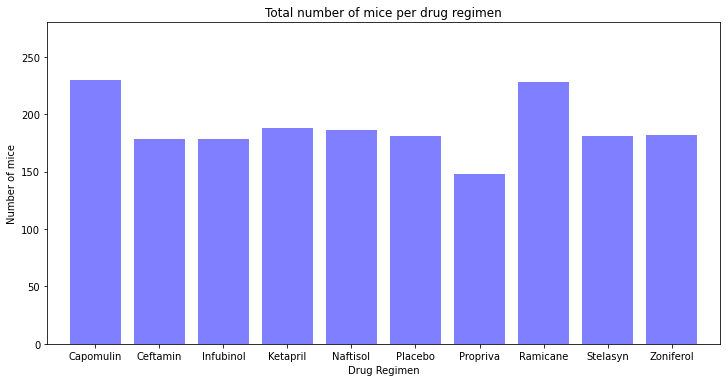

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Need a list, we already have unique_mice
list_mice = num_mice.tolist()
x_axis = np.arange(len(list_mice))

# Need a list for our tick locations/x_axis, we have summary stats table2
reg_names = summary_stats_table2.index.tolist()
#reg_names

# Create a bar plot
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.bar(reg_names, list_mice, color="b", alpha=0.5, align="center")
plt.tight_layout()
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(list_mice)+ 50)
plt.title("Total number of mice per drug regimen")
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of mice", fontsize=10)
plt.show()

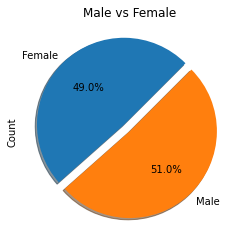

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groupby = clean_df.groupby(["Sex"]).count()["Mouse ID"]
gender_df = pd.DataFrame(gender_groupby)
gender_df.reset_index(inplace=True)
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
#gender_df

explode = (0.1, 0)
gender_df.plot(kind="pie", y="Count", labels=gender_df["Sex"], explode=explode, autopct="%1.1f%%",
               shadow=True, startangle=45, legend=False)

plt.title("Male vs Female")
plt.show()

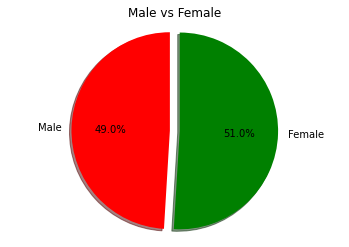

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = gender_df["Count"].tolist()

genders = ["Male", "Female"]
colors = ["Red", "Green"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Male vs Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimen_df = regimen_df.sort_values(["Timepoint"], ascending=True)
regimen_df.head()

# Only grab the columns we want
smaller_regimen_df = regimen_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
smaller_regimen_df

# Get the final tumor volume
final_tumor_df = smaller_regimen_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
final_tumor_df = final_tumor_df.to_frame()
final_tumor_df.reset_index(inplace=True)
final_tumor_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = [treatment for treatment in smaller_regimen_df["Drug Regimen"].unique()]
print(treatment_list)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df = final_tumor_df.sort_values(["Drug Regimen"], ascending=True).reset_index()
tumor_vol_df

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(treatment_list)):
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    single_reg = tumor_vol_df[tumor_vol_df["Drug Regimen"].isin([treatment_list[x]])]
    single_reg.reset_index(inplace=True)
    single_tumor_vol = single_reg["Tumor Volume (mm3)"]
    single_tumor_vol_sort = single_tumor_vol.sort_values(ascending=True).reset_index(drop=True)

    
      
    # Determine outliers using upper and lower bounds
    quartiles = single_tumor_vol_sort.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The lower quartile of {treatment_list[x]} is: {lowerq}")
    print(f"The upper quartile of {treatment_list[x]} is: {upperq}")
    print(f"The interquartile range of {treatment_list[x]} is: {iqr}")
    print(f"The median of {treatment_list[x]} is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("----------------------------------------------")

['Ramicane', 'Infubinol', 'Capomulin', 'Ceftamin']
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
----------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
----------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.832015

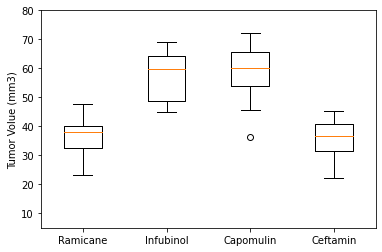

In [172]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_df
vol_list = final_tumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
vol_list_df = pd.DataFrame(vol_list)
graph_vol = [vol for vol in vol_list_df["Tumor Volume (mm3)"]]
#graph_vol
plt.boxplot(graph_vol, labels=treatment_list)
plt.ylim(5, 80)
plt.ylabel("Tumor Volue (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse ID B742')

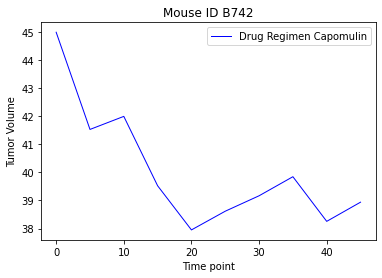

In [150]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#b742
mouse = clean_df[clean_df["Mouse ID"].isin(["b742"])]
time_tumor = mouse[["Timepoint", "Tumor Volume (mm3)"]]
time_tumor.reset_index(drop=True, inplace=True)
#print(time_tumor)

time = time_tumor.iloc[:,0].tolist()
tumor = time_tumor.iloc[:,1].tolist()
#type(tumor)

plt.plot(time, tumor,color='b', linewidth=1, label='Drug Regimen Capomulin')
plt.legend(loc="best")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume")
plt.title("Mouse ID B742")

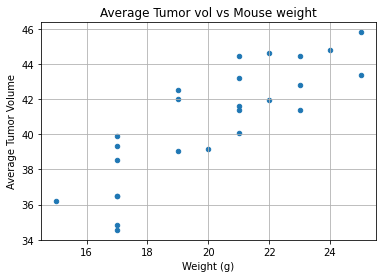

In [152]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatt = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
weight = cap_scatt[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight

avg_weight = pd.DataFrame(weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean())
avg_weight.reset_index(inplace=True)
avg_weight = avg_weight.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})

avg_weight.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True)
plt.title("Average Tumor vol vs Mouse weight")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


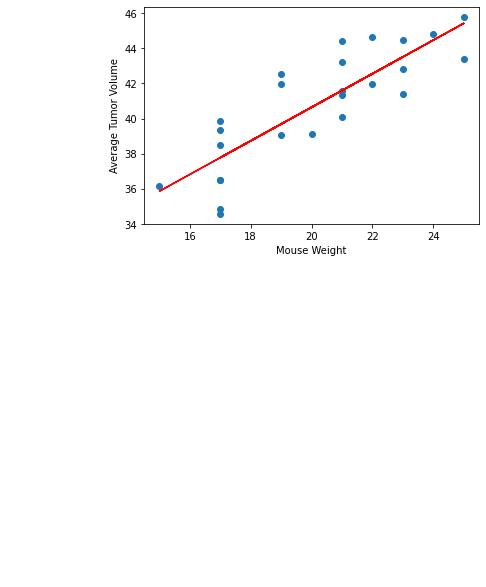

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mw = avg_weight.iloc[:,1]
avg_tum = avg_weight.iloc[:,2]

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mw,avg_tum)[0],2)}")

## linear
slope, inter, rv, pv, std_err = st.linregress(mw, avg_tum)
regress_values = mw * slope + inter

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(mw, avg_tum)
plt.plot(mw,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=20,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()